In [223]:
import pandas as pd
import numpy as np
import requests
import math
import time
import json
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt

from summa import keywords
import yake

import ast

In [2]:
PER_PAGE=200
WAIT_SECS=0.15
WORKS_FILE_PATH = './data/works.json'

In [66]:
def fetch_page(cursor):
    base_url='https://api.openalex.org/works'
    url = '{base_url}?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor={cursor}&per-page={per_page}&mailto={mailto}'.format(
        base_url=base_url,
        cursor=cursor,
        per_page=PER_PAGE,
        mailto='bertagrim@gmail.com'
    )
    print('Senging GET {url}'.format(url=url))
          
    response = requests.get(url)
    
    if (response.status_code == 200):
        print('OK')
        return response.json()
    else:
        print('Request failed: {status_code}'.format(status_code=response.status_code))
        print(response.text)
    


In [67]:
def save_entries(page_n, results):
    offset = page_n * PER_PAGE
    from_entry_num = offset
    to_entry_num = from_entry_num + len(results)
    print('Saving new entries in positions: {from_entry_num}..{to_entry_num}'.format(
        from_entry_num=from_entry_num,
        to_entry_num=to_entry_num
    ))
    with open(WORKS_FILE_PATH, 'r+', encoding='utf-8') as file:
        entries = json.load(file)
        entries[from_entry_num:] = results
        file.seek(0)
        json.dump(entries, file)

In [68]:
page_1 = fetch_page('*')
num_pages = math.ceil(page_1['meta']['count']/PER_PAGE)
num_pages

Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=*&per-page=200&mailto=bertagrim@gmail.com
OK


248

In [73]:
cursor='*'
works=[]
for page_n in range(0, num_pages):
    print("Fetching page {} ...".format(page_n))
    page = fetch_page(cursor)
    works.extend(page['results'])
#     save_entries(
#         page_n=page_n,
#         results=page['results']
#     )
    time.sleep(WAIT_SECS)
    cursor=page['meta']['next_cursor']
    
with open(WORKS_FILE_PATH, 'w', encoding='utf-8') as file:
        json.dump(works, file)


Fetching page 0 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=*&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 1 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=Ils0NjMuODIzNTIsIDE0OTg0MzUyMDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjY4MzcwMjY5OCddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 2 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlszODEuNDI1MzUsIDE1OTc4ODE2MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMzA2MTExOTc1NCddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 3 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_s

OK
Fetching page 27 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsxNjcuMDk4MjUsIDE2Mjc0MzA0MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMzE4NjY0MjYyNCddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 28 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsxNjUuMjUyMTIsIDE1OTM1NjE2MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjkwMzE2MTk2OSddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 29 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsxNjIuNDk2MTUsIDE1NDg5NzkyMDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjg5NTU1NjIyNCddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 30 ...
Senging GET https://api.openalex.org/

OK
Fetching page 54 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsxMjAuNzk5MjUsIDE1MTQ3NjQ4MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjc3NDc5MTkwMCddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 55 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsxMjAuMDkxNzc0LCAxNTA0MTM3NjAwMDAwLCAnaHR0cHM6Ly9vcGVuYWxleC5vcmcvVzMwOTkyNjg2MDMnXSI=&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 56 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsxMTguMTcwMDcsIDE1MTQ3NjQ4MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjc2OTA0ODM1OSddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 57 ...
Senging GET https://api.openalex.org/

OK
Fetching page 81 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=Ils5MC40MzI2MjUsIDE1ODE5ODQwMDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMzAwOTAxNTg5MyddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 82 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=Ils4OS42MDYyMSwgMTUzMzg1OTIwMDAwMCwgJ2h0dHBzOi8vb3BlbmFsZXgub3JnL1cyODg2ODk3MjA3J10i&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 83 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=Ils4OC45ODQzNzUsIDE0OTk2NDQ4MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjcyNjI1NjYyMSddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 84 ...
Senging GET https://api.openalex.org/work

OK
Fetching page 108 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=Ils2Ni45Njk0NDQsIDE1ODA1MTUyMDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjk4MTExMDg2NSddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 109 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=Ils2Ni44OTMwNiwgMTU5NjI0MDAwMDAwMCwgJ2h0dHBzOi8vb3BlbmFsZXgub3JnL1czMDI4OTc0MTQ5J10i&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 110 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=Ils2Ni43MTA4MywgMTYwNzM4NTYwMDAwMCwgJ2h0dHBzOi8vb3BlbmFsZXgub3JnL1czMDg0MzEyMDM4J10i&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 111 ...
Senging GET https://api.openalex.org/work

OK
Fetching page 135 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=Ils0NS40OTIxODgsIDE0OTg4NjcyMDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjc1NDM3MzM1NSddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 136 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=Ils0Mi41MzEzNywgMTYyNTcwMjQwMDAwMCwgJ2h0dHBzOi8vb3BlbmFsZXgub3JnL1czMTgyMDA5MzI4J10i&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 137 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=Ils0MS45NjQ3OSwgMTYyMTgxNDQwMDAwMCwgJ2h0dHBzOi8vb3BlbmFsZXgub3JnL1czMTY1NTMyOTMxJ10i&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 138 ...
Senging GET https://api.openalex.org/work

OK
Fetching page 162 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsyLjAsIDE0ODgzMjY0MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XNDI5NzQ0NTI4NSddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 163 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsyLjAsIDE0OTEwMDQ4MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjczNTc4NjQ1NSddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 164 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsyLjAsIDE0OTM1OTY4MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XNDMwMjM1NTg3MSddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 165 ...
Senging GET https://api.openalex.org/works?filter=from_pu

OK
Fetching page 189 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsyLjAsIDE1MzY3MTA0MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjkxMDMwODU2OSddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 190 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsyLjAsIDE1MzgzNTIwMDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjkwMjQ2Mzc4NCddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 191 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsyLjAsIDE1NDAwODAwMDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjg4Nzc5ODg2OSddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 192 ...
Senging GET https://api.openalex.org/works?filter=from_pu

OK
Fetching page 216 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsyLjAsIDE1ODM4ODQ4MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjk1MzY3NjU5NCddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 217 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsyLjAsIDE1ODc2MDAwMDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMzA4MzYyOTIwMCddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 218 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsyLjAsIDE1OTAwMTkyMDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMzE4ODUwMTUzNSddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 219 ...
Senging GET https://api.openalex.org/works?filter=from_pu

OK
Fetching page 243 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsyLjAsIDE2MzMzMDU2MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XNDIwMDI1OTg3NyddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 244 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsyLjAsIDE2MzQ4NjA4MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMzIxMTE1ODYwMCddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 245 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsyLjAsIDE2MzYwNzA0MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XNDIyNTU2MjA5MCddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 246 ...
Senging GET https://api.openalex.org/works?filter=from_pu

In [3]:
with open(WORKS_FILE_PATH) as f:
    data = json.load(f)

In [4]:
data_string = json.dumps(data)

In [5]:
df = pd.read_json(data_string)

In [6]:
df.drop(columns=['is_authors_truncated', 
                 'is_retracted', 
                 'related_works', 
                 'alternate_host_venues', 
                 'is_paratext', 
                 'mesh', 
                 'updated_date', 
                 'created_date', 
                 'open_access',
                'cited_by_api_url',
                'counts_by_year'], inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49579 entries, 0 to 49578
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       49579 non-null  object 
 1   doi                      39389 non-null  object 
 2   title                    49572 non-null  object 
 3   display_name             49572 non-null  object 
 4   relevance_score          49579 non-null  float64
 5   publication_year         49579 non-null  int64  
 6   publication_date         49579 non-null  object 
 7   ids                      49579 non-null  object 
 8   host_venue               49579 non-null  object 
 9   type                     46346 non-null  object 
 10  authorships              49579 non-null  object 
 11  cited_by_count           49579 non-null  int64  
 12  biblio                   49579 non-null  object 
 13  concepts                 49579 non-null  object 
 14  referenced_works      

## Exercise 1

In [412]:
df1=df[['id', 'title', 'concepts', 'publication_year', 'publication_date']]

In [413]:
df1_clean = df1.dropna().reset_index().drop(columns='index')

In [414]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49572 entries, 0 to 49571
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                49572 non-null  object
 1   title             49572 non-null  object
 2   concepts          49572 non-null  object
 3   publication_year  49572 non-null  int64 
 4   publication_date  49572 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.9+ MB


In [415]:
df1_clean['publication_date']=pd.to_datetime(df1_clean['publication_date'])

In [416]:
df1_clean['month_year'] = pd.to_datetime(df1_clean['publication_date']).dt.to_period('M')

In [417]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49572 entries, 0 to 49571
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                49572 non-null  object        
 1   title             49572 non-null  object        
 2   concepts          49572 non-null  object        
 3   publication_year  49572 non-null  int64         
 4   publication_date  49572 non-null  datetime64[ns]
 5   month_year        49572 non-null  period[M]     
dtypes: datetime64[ns](1), int64(1), object(3), period[M](1)
memory usage: 2.3+ MB


In [418]:
df1_clean.title.duplicated().sum()

3085

In [419]:
df1_clean = df1_clean.drop_duplicates(subset=['title'], ignore_index=True)

In [420]:
def get_concepts_0(orig_list):
    pruned_list=[item['display_name'] for item in orig_list if item['level']==0]
    return pruned_list

In [421]:
df1_clean['concepts_level_0']=df1_clean['concepts'].apply(get_concepts_0)

In [422]:
df1_clean.publication_year.value_counts()

2017    9594
2018    9413
2019    9261
2020    9165
2021    9054
Name: publication_year, dtype: int64

<AxesSubplot:xlabel='publication_year', ylabel='count'>

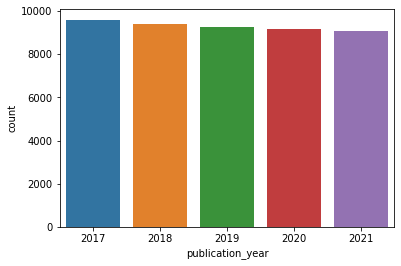

In [23]:
sns.countplot(data = df1_clean, x="publication_year")

In [26]:
categories=[]
for item in df1_clean['concepts_level_0'].values:
    categories.extend(item)
unique=list(set(categories))
len(unique)

19

In [27]:
unique

['Geography',
 'Economics',
 'Art',
 'Environmental science',
 'Philosophy',
 'History',
 'Materials science',
 'Mathematics',
 'Biology',
 'Engineering',
 'Chemistry',
 'Business',
 'Physics',
 'Computer science',
 'Political science',
 'Psychology',
 'Sociology',
 'Geology',
 'Medicine']

In [424]:
s = df1_clean['concepts_level_0']

In [425]:
dummies = pd.get_dummies(s.apply(pd.Series), prefix='', prefix_sep='').sum(level=0, axis=1)

/var/folders/kb/lywh42216h13zy46p5f_0fg40000gn/T/ipykernel_3648/2091366517.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dummies = pd.get_dummies(s.apply(pd.Series), prefix='', prefix_sep='').sum(level=0, axis=1)
/var/folders/kb/lywh42216h13zy46p5f_0fg40000gn/T/ipykernel_3648/2091366517.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  dummies = pd.get_dummies(s.apply(pd.Series), prefix='', prefix_sep='').sum(level=0, axis=1)


In [426]:
final = pd.concat([df1_clean, dummies], axis=1).drop(columns=['concepts', 'concepts_level_0'])

In [427]:
final.head()

,id,title,publication_year,publication_date,month_year,Art,Biology,Business,Chemistry,Computer science,...,Geology,History,Materials science,Mathematics,Medicine,Philosophy,Physics,Political science,Psychology,Sociology
0,https://openalex.org/W2511949746,EAU-ESTRO-SIOG Guidelines on Prostate Cancer. ...,2017,2017-04-01,2017-04,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,https://openalex.org/W2805354595,Atezolizumab for First-Line Treatment of Metas...,2018,2018-06-04,2018-06,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,https://openalex.org/W4205946977,Neoliberalizing Space,2020,2020-06-22,2020-06,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,https://openalex.org/W2796277309,Review on nanoparticles and nanostructured mat...,2018,2018-04-03,2018-04,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,https://openalex.org/W2969802526,A global view of hepatocellular carcinoma: tre...,2019,2019-08-22,2019-08,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [86]:
grouped = final.groupby(['publication_year'])

In [137]:
grouped_months = final.groupby(['month_year'])

In [144]:
grouped_months

In [152]:
new_df=pd.DataFrame()
for value in unique:
    new_df[value]=grouped[value].sum()

In [141]:
df_months=pd.DataFrame()
for value in unique:
    df_months[value]=grouped_months[value].sum()

In [156]:
df_months = df_months.apply(pd.to_numeric)

In [50]:
range(len(new_df))

5

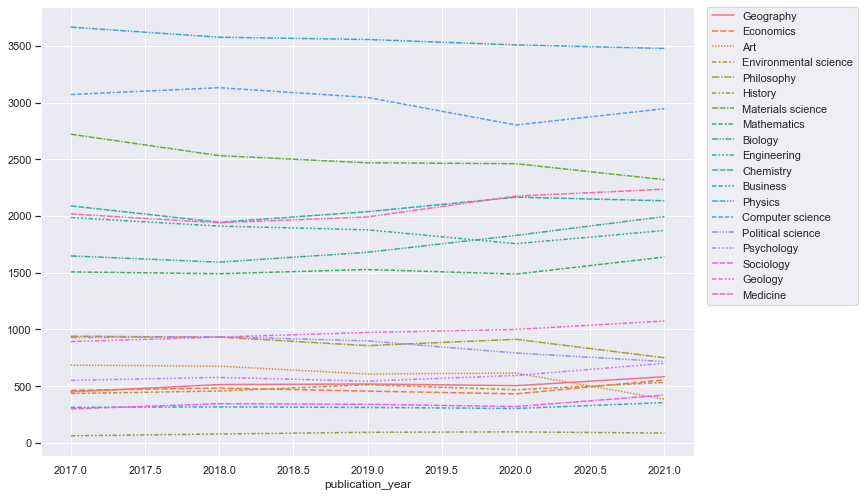

In [153]:
# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
g = sns.lineplot(data=new_df)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
# g.set_xticks([1,2,3,4,5]) # <--- set the ticks first
# g.set_xticklabels([2017,2018,2019,2020,2021])
# plt.xticks(range(len(new_df)),['2017','2018','2019','2020','2021'])
# sns.set(rc={"xtick.bottom" : False, "ytick.left" : True})


TypeError: Invalid object type at position 0

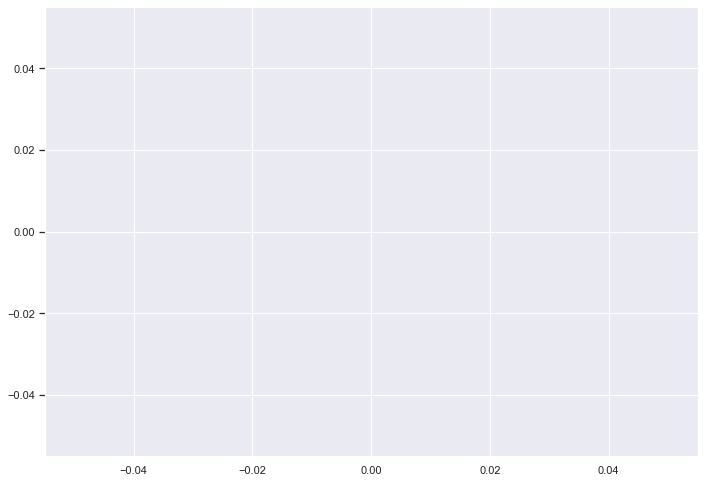

In [157]:
# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
g = sns.lineplot(data=df_months)
# plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
# g.set_xticks([1,2,3,4,5]) # <--- set the ticks first
# g.set_xticklabels([2017,2018,2019,2020,2021])
# plt.xticks(range(len(new_df)),['2017','2018','2019','2020','2021'])
# sns.set(rc={"xtick.bottom" : False, "ytick.left" : True})


In [37]:
social=['Economics', 'Sociology', 'Political science', 'Business', 'Geography']
earth_science=['Medicine','Biology', 'Environmental science', 'Geology', 'Psychology', 'Materials science']
engineering_maths=['Engineering', 'Computer science', 'Chemistry', 'Physics', 'Mathematics']
humanities=['Philosophy', 'History', 'Art']

In [38]:
new_df_social=new_df[social]
new_df_earth=new_df[earth_science]
new_df_engineering=new_df[engineering_maths]
new_df_humanities=new_df[humanities]

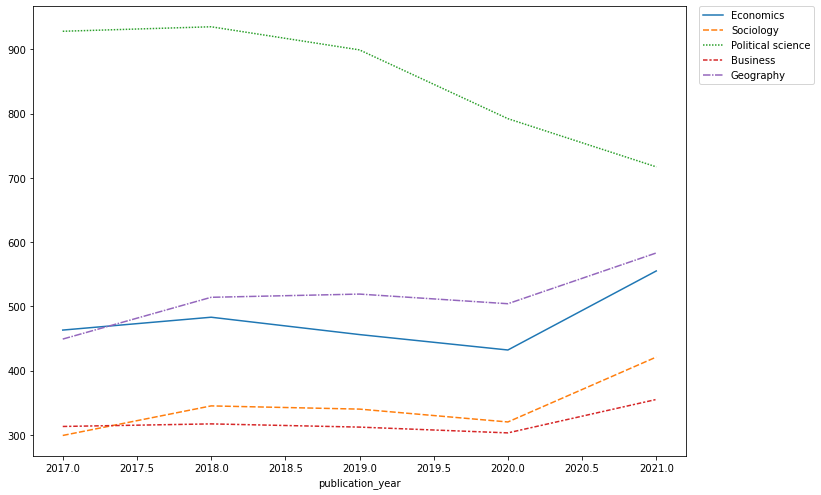

In [39]:

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
sns.lineplot(data=new_df_social)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


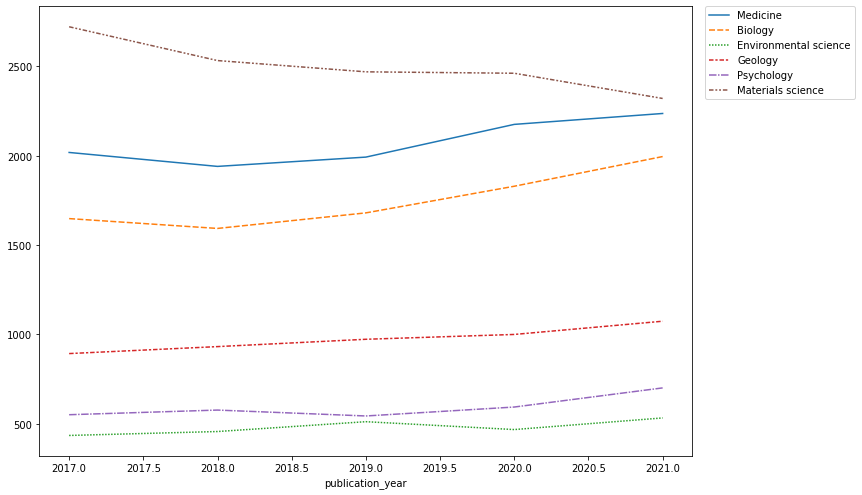

In [40]:
# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
sns.lineplot(data=new_df_earth)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

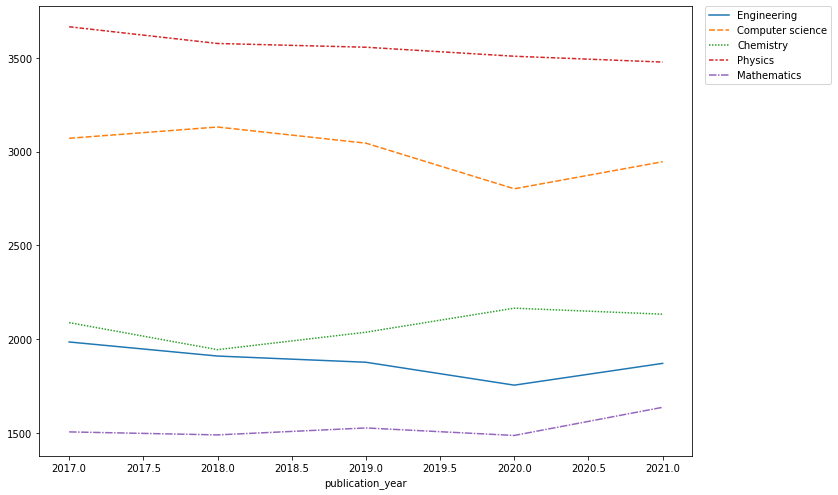

In [41]:

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
sns.lineplot(data=new_df_engineering)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


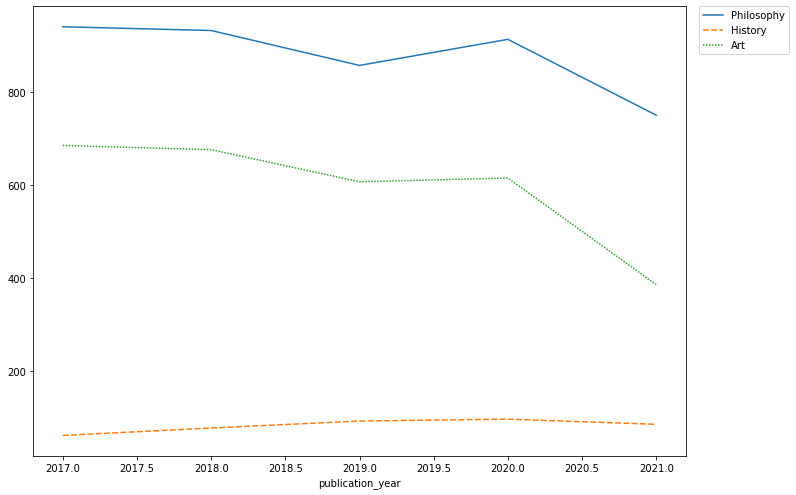

In [42]:
# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
sns.lineplot(data=new_df_humanities)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# Exercise 2

1. Get all the publications that have at least 2 authors in them
2.  Notions of centrality: 
 -  Connectedness 1: How many publications with grenoble authors they have
 - Connectedness 2: With how many different grenoble authors they have published
 -  A factor of the two
 -  A factor of the first two with the average impact factor of their publications with Grenoble authors
 -  A recursive notion: number of connections with connected authors
3. Download the grenoble authors and check their cited scores. See if there is a correlation with connectedness
 

In [24]:
df2=df[['id', 'authorships',]]

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49579 entries, 0 to 49578
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           49579 non-null  object
 1   authorships  49579 non-null  object
dtypes: object(2)
memory usage: 774.8+ KB


## Connectedness 1

In [26]:
def num_grenoble_authors(row):
    return len([author for author in row['authorships'] if (author['raw_affiliation_string'] is not None) and ("grenoble" in author['raw_affiliation_string'].lower())])

In [27]:
df2['num_grenoble_authors'] = df2.apply(num_grenoble_authors, axis=1)

/var/folders/kb/lywh42216h13zy46p5f_0fg40000gn/T/ipykernel_3648/4223153541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['num_grenoble_authors'] = df2.apply(num_grenoble_authors, axis=1)


In [28]:
df2['is_connected'] = df2.apply(lambda row: 1 if num_grenoble_authors(row)>1 else 0, axis=1)

/var/folders/kb/lywh42216h13zy46p5f_0fg40000gn/T/ipykernel_3648/626185418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['is_connected'] = df2.apply(lambda row: 1 if num_grenoble_authors(row)>1 else 0, axis=1)


In [29]:
def extract_author_ids(row):
    authors = [author['author']['id'] for author in row['authorships']]
    return authors

df2['authors'] = df2.apply(lambda row: extract_author_ids(row), axis=1) 

/var/folders/kb/lywh42216h13zy46p5f_0fg40000gn/T/ipykernel_3648/316629148.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['authors'] = df2.apply(lambda row: extract_author_ids(row), axis=1)


In [30]:
flat_list = [item for items in df2.authorships.values for item in items if (item['raw_affiliation_string'] is not None) and ('grenoble' in item['raw_affiliation_string'].lower())]


In [57]:
authors_sim = [{'author_id': item['author']['id'],
  'name':item['author']['display_name']}
 for item in flat_list]

In [72]:
grenoble_authors = pd.DataFrame.from_dict(authors_sim)

In [73]:
grenoble_authors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115592 entries, 0 to 115591
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   author_id  115592 non-null  object
 1   name       115592 non-null  object
dtypes: object(2)
memory usage: 1.8+ MB


In [74]:
grenoble_authors = grenoble_authors.drop_duplicates(ignore_index=True)

In [75]:
grenoble_authors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36958 entries, 0 to 36957
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  36958 non-null  object
 1   name       36958 non-null  object
dtypes: object(2)
memory usage: 577.6+ KB


In [76]:
work_author_pairs = df2[df2['is_connected']==1][['id', 'authors']]

In [77]:
work_author_pairs = work_author_pairs.explode('authors')

In [78]:
grenoble_work_author_pairs = work_author_pairs[work_author_pairs['authors'].isin(grenoble_authors['author_id'])]

In [79]:
count_works = grenoble_work_author_pairs.groupby('authors').count().reset_index()
count_works

,authors,id
0,https://openalex.org/A1002805135,2
1,https://openalex.org/A1007915466,6
2,https://openalex.org/A100908830,1
3,https://openalex.org/A1009761877,4
4,https://openalex.org/A1015310080,1
...,...,...
28519,https://openalex.org/A974871389,17
28520,https://openalex.org/A975039927,1
28521,https://openalex.org/A97906723,6
28522,https://openalex.org/A985776687,4


In [66]:
def get_connectedness1(row):
    author_id = row['author_id']
    if not count_works['id'][count_works['authors']==author_id].empty:
        count = count_works['id'][count_works['authors']==author_id].values[0]
        return count
    else:
        return 0

In [80]:
grenoble_authors['connectedness_1']=grenoble_authors.apply(get_connectedness1, axis=1)

In [81]:
grenoble_authors[grenoble_authors.name=="Jean-Louis Pépin"]

,author_id,name,connectedness_1
8,https://openalex.org/A2596381244,Jean-Louis Pépin,206
13161,https://openalex.org/A4227283002,Jean-Louis Pépin,1
19358,https://openalex.org/A4202217154,Jean-Louis Pépin,1
32826,https://openalex.org/A4260292885,Jean-Louis Pépin,1
35347,https://openalex.org/A4261509675,Jean-Louis Pépin,1


## Connectedness 2

In [82]:
def get_connectedness2(row):
    author_id = row['author_id']
    works = grenoble_work_author_pairs['id'][grenoble_work_author_pairs['authors']==author_id]
    num_colabs = len(np.unique((grenoble_work_author_pairs['authors'][(grenoble_work_author_pairs['authors']!=author_id) & grenoble_work_author_pairs['id'].isin(list(works))]).values))
    return num_colabs

In [83]:
grenoble_authors['connectedness_2']=grenoble_authors.apply(get_connectedness2, axis=1)
#takes 30 minutes. save in csv at this point

In [84]:
grenoble_authors.to_csv('data/grenoble_authors.csv', index=False)

In [85]:
grenoble_authors = pd.read_csv('data/grenoble_authors.csv')  

In [88]:
grenoble_authors

,author_id,name,connectedness_1,connectedness_2,connectedness_3
0,https://openalex.org/A2081927895,Michel Bolla,1,8,8
1,https://openalex.org/A2967507403,Christian A. Thomas,0,0,0
2,https://openalex.org/A4208415029,Frédéric Bally,0,0,0
3,https://openalex.org/A2050409607,Alain Dufresne,38,36,1368
4,https://openalex.org/A2061986354,Pierre Hainaut,23,103,2369
...,...,...,...,...,...
36953,https://openalex.org/A4207761270,Isabelle Lordey,1,6,6
36954,https://openalex.org/A4208119760,Rolando Rebois,1,4,4
36955,https://openalex.org/A4225885156,"Meulemans, Germain",0,0,0
36956,https://openalex.org/A4227555375,Yassine Laguel,0,0,0


## Connectedness 3

In [89]:
grenoble_authors['connectedness_3'] = grenoble_authors['connectedness_1'] * grenoble_authors['connectedness_2']

In [90]:
grenoble_authors

,author_id,name,connectedness_1,connectedness_2,connectedness_3
0,https://openalex.org/A2081927895,Michel Bolla,1,8,8
1,https://openalex.org/A2967507403,Christian A. Thomas,0,0,0
2,https://openalex.org/A4208415029,Frédéric Bally,0,0,0
3,https://openalex.org/A2050409607,Alain Dufresne,38,36,1368
4,https://openalex.org/A2061986354,Pierre Hainaut,23,103,2369
...,...,...,...,...,...
36953,https://openalex.org/A4207761270,Isabelle Lordey,1,6,6
36954,https://openalex.org/A4208119760,Rolando Rebois,1,4,4
36955,https://openalex.org/A4225885156,"Meulemans, Germain",0,0,0
36956,https://openalex.org/A4227555375,Yassine Laguel,0,0,0


In [91]:
grenoble_authors.nlargest(10, 'connectedness_3')

,author_id,name,connectedness_1,connectedness_2,connectedness_3
8,https://openalex.org/A2596381244,Jean-Louis Pépin,206,220,45320
2037,https://openalex.org/A2196954048,Gerard Ghibaudo,148,249,36852
173,https://openalex.org/A2420782966,Renaud Tamisier,180,179,32220
1397,https://openalex.org/A1975902673,Jean-François Timsit,130,207,26910
613,https://openalex.org/A2308027254,J.M. Hartmann,101,248,25048
205,https://openalex.org/A1955230402,Yohann Couté,97,244,23668
1430,https://openalex.org/A2974844775,Maud Vinet,88,231,20328
1851,https://openalex.org/A2171459722,Laurence Bouillet,94,203,19082
1429,https://openalex.org/A1916288200,Sylvain Barraud,92,177,16284
1175,https://openalex.org/A2577985073,Jean-Luc Bosson,60,255,15300


# Exercise 3

In [371]:
df3 = df[['id', 'title', 'abstract_inverted_index']]

In [372]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49579 entries, 0 to 49578
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       49579 non-null  object
 1   title                    49572 non-null  object
 2   abstract_inverted_index  40226 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


In [373]:
df3 = df3.dropna().reset_index().drop(columns='index')

In [374]:
df3 = df3[df3['abstract_inverted_index']!={}].reset_index().drop(columns='index')
#some indexs are empty dictionaries

In [375]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40211 entries, 0 to 40210
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       40211 non-null  object
 1   title                    40211 non-null  object
 2   abstract_inverted_index  40211 non-null  object
dtypes: object(3)
memory usage: 942.6+ KB


In [376]:
df3 = df3.drop_duplicates(subset=['title'], ignore_index=True)

In [377]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39409 entries, 0 to 39408
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       39409 non-null  object
 1   title                    39409 non-null  object
 2   abstract_inverted_index  39409 non-null  object
dtypes: object(3)
memory usage: 923.8+ KB


## Compose index

In [378]:
def compose_abstract(row):
    inverted_index=row['abstract_inverted_index']
    
    num_to_word={}
    for key, values in inverted_index.items():
        for value in values:
            num_to_word[value]=key

    abstract=[]
    k=0
    while k <= max(num_to_word.keys()):
        if k in num_to_word: 
            abstract.append(num_to_word[k])
        k+=1

    return ' '.join(abstract)


In [379]:
df3['abstract']=df3.apply(compose_abstract, axis=1)

## Extract keywords

In [293]:
from nltk import TreebankWordTokenizer
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
# nltk.download('wordnet')
# nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
import string

tokenizer = TreebankWordTokenizer()
stop_words_en = stopwords.words('english')
stop_words_fr = stopwords.words('french')
lemmatizer = WordNetLemmatizer()

punct = string.punctuation
punct = punct.replace("-", "") # don't remove hyphens

In [294]:
#for keyword extraction:
#ttps://www.analyticsvidhya.com/blog/2022/01/four-of-the-easiest-and-most-effective-methods-of-keyword-extraction-from-a-single-text-using-python/

In [380]:
def clean_text(text_data):
#     no_punct = text_data.translate(str.maketrans('', '', punct))
    
    tokens = tokenizer.tokenize(text_data)
    
    lowercased = [w.lower() for w in tokens]
    
    no_sw = [w for w in lowercased if (not w in stop_words_en and not w in stop_words_fr)]
    
    lemmas = [lemmatizer.lemmatize(word) for word in no_sw]
    
    no_punct = [w for w in lemmas if w.isalpha()]#if more time, avoid deleting dashes
    
    final = [w for w in no_punct if len(w)>2]
    
    return ' '.join(final)

In [381]:
df3['clean_abstract']=df3['abstract'].apply(clean_text)

In [382]:
df3['clean_title']=df3['title'].apply(clean_text)

In [383]:
df3.head()

,id,title,abstract_inverted_index,abstract,clean_abstract,clean_title
0,https://openalex.org/W2511949746,EAU-ESTRO-SIOG Guidelines on Prostate Cancer. ...,"{'To': [0], 'present': [1, 392], 'a': [2, 49, ...",To present a summary of the 2016 version of th...,present summary version european association u...,guideline prostate part screening diagnosis lo...
1,https://openalex.org/W2805354595,Atezolizumab for First-Line Treatment of Metas...,"{'The': [0, 84, 147, 183, 330], 'cancer-cell-k...",The cancer-cell-killing property of atezolizum...,property atezolizumab may enhanced blockade va...,atezolizumab treatment metastatic nonsquamous ...
2,https://openalex.org/W2796277309,Review on nanoparticles and nanostructured mat...,"{'Nanomaterials': [0], '(NMs)': [1], 'have': [...",Nanomaterials (NMs) have gained prominence in ...,nanomaterials gained prominence technological ...,review nanoparticles nanostructured material h...
3,https://openalex.org/W2969802526,A global view of hepatocellular carcinoma: tre...,"{'Hepatocellular': [0], 'carcinoma': [1], '(HC...",Hepatocellular carcinoma (HCC) is the fourth m...,hepatocellular carcinoma hcc fourth common cau...,global view hepatocellular carcinoma trend ris...
4,https://openalex.org/W2885896746,Clinical Practice Guidelines for the Preventio...,"{'To': [0], 'update': [1], 'and': [2, 15, 27, ...",To update and expand the 2013 Clinical Practic...,update expand clinical practice guideline mana...,clinical practice guideline prevention managem...


In [410]:
kw_extractor = yake.KeywordExtractor(top=10, stopwords=None)
keywords = kw_extractor.extract_keywords(df3.clean_abstract[2])
for kw, v in keywords:
    print("Keyphrase: ",kw, ": score", v)

Keyphrase:  nanomaterials gained prominence : score 0.0011750413565956707
Keyphrase:  gained prominence technological : score 0.001643206405302012
Keyphrase:  prominence technological advancement : score 0.001643206405302012
Keyphrase:  tunable physical chemical : score 0.001643206405302012
Keyphrase:  physical chemical biological : score 0.001643206405302012
Keyphrase:  enhanced performance bulk : score 0.001643206405302012
Keyphrase:  performance bulk categorized : score 0.001643206405302012
Keyphrase:  bulk categorized depending : score 0.001643206405302012
Keyphrase:  categorized depending size : score 0.001643206405302012
Keyphrase:  depending size composition : score 0.001643206405302012


In [384]:
def extract_keywords(row):
    kwds_abs = keywords.keywords(row['clean_abstract'], scores=False).split()[0:10]
    kwds_title = keywords.keywords(row['clean_title'], scores=False).split()[0:10]
    return list(set(kwds_abs+kwds_title))

In [385]:
df3['keywords'] = df3.apply(extract_keywords, axis=1)

In [386]:
df3.to_csv('data/extracted_keywords.csv', index=False)

In [387]:
df3 = pd.read_csv('data/extracted_keywords.csv')  

In [388]:
df3

,id,title,abstract_inverted_index,abstract,clean_abstract,clean_title,keywords
0,https://openalex.org/W2511949746,EAU-ESTRO-SIOG Guidelines on Prostate Cancer. ...,"{'To': [0], 'present': [1, 392], 'a': [2, 49, ...",To present a summary of the 2016 version of th...,present summary version european association u...,guideline prostate part screening diagnosis lo...,"['local', 'increased', 'screening', 'discussio..."
1,https://openalex.org/W2805354595,Atezolizumab for First-Line Treatment of Metas...,"{'The': [0, 84, 147, 183, 330], 'cancer-cell-k...",The cancer-cell-killing property of atezolizum...,property atezolizumab may enhanced blockade va...,atezolizumab treatment metastatic nonsquamous ...,"['expression', 'abcp', 'atezolizumab', 'popula..."
2,https://openalex.org/W2796277309,Review on nanoparticles and nanostructured mat...,"{'Nanomaterials': [0], '(NMs)': [1], 'have': [...",Nanomaterials (NMs) have gained prominence in ...,nanomaterials gained prominence technological ...,review nanoparticles nanostructured material h...,"['naturally', 'nsms', 'nanoparticles', 'associ..."
3,https://openalex.org/W2969802526,A global view of hepatocellular carcinoma: tre...,"{'Hepatocellular': [0], 'carcinoma': [1], '(HC...",Hepatocellular carcinoma (HCC) is the fourth m...,hepatocellular carcinoma hcc fourth common cau...,global view hepatocellular carcinoma trend ris...,"['potentially', 'view', 'prevention', 'treatme..."
4,https://openalex.org/W2885896746,Clinical Practice Guidelines for the Preventio...,"{'To': [0], 'update': [1], 'and': [2, 15, 27, ...",To update and expand the 2013 Clinical Practic...,update expand clinical practice guideline mana...,clinical practice guideline prevention managem...,"['question', 'recommendation', 'evidence', 'gu..."
...,...,...,...,...,...,...,...
39404,https://openalex.org/W3206012900,Effect of ground technicity on cardio-respirat...,"{'The': [0, 256], 'goal': [1], 'of': [2, 10, 7...",The goal of this study was to analyse the effe...,goal study analyse effect ground technicity bi...,effect ground technicity biomechanical paramet...,"['technicities', 'biomechanical', 'trail', 'di..."
39405,https://openalex.org/W4200599600,Superquantiles at Work: Machine Learning Appli...,"{'R.': [0], 'Tyrell': [1], 'Rockafellar': [2],...",R. Tyrell Rockafellar and his collaborators in...,tyrell rockafellar collaborator introduced ser...,superquantiles work machine learning applicati...,"['new', 'recent', 'toy', 'method', 'smooth', '..."
39406,https://openalex.org/W4205416072,Combined Use of Whole Exome Sequencing and CRI...,"{'The': [0], 'genetic': [1], 'landscape': [2],...",The genetic landscape of male infertility is h...,genetic landscape male infertility highly esti...,combined use whole exome sequencing study etio...,"['noa', 'spermatogenesis', 'involved', 'mouse'..."
39407,https://openalex.org/W4205834098,Nanoscale mineralogy and organic structure in ...,"{'Meteorite': [0], 'matrices': [1, 187], 'from...",Meteorite matrices from primitive chondrites a...,meteorite matrix primitive chondrite interplay...,nanoscale mineralogy organic structure orgueil...,"['meteorite', 'primitive', 'impact', 'composit..."


In [389]:
flat_kwds = [item for items in [ast.literal_eval(item) for item in df3.keywords.values] for item in items]


In [395]:
common_academic_ws = 'ability, absence, account, achievement, act, action, activity, addition, adoption, adult, advance, advantage, advice, age, aim, alternative, amount, analogy, analysis, application, approach, argument, aspect, assertion, assessment, assistance, association, assumption, attempt, attention, attitude, author, awareness, balance, basis, behaviour, being, belief, benefit, bias, birth, capacity, case, category, cause, centre, challenge, change, character, characteristic, choice, circumstance, class, classification, code, colleague, combination, commitment, committee, communication, community, comparison, complexity, compromise, concentration, concept, conception, concern, conclusion, condition, conduct, conflict, consensus, consequence, consideration, constraint, construction, content, contradiction, contrast, contribution, control, convention, correlation, country, creation, crisis, criterion, criticism, culture, damage, data, debate, decision, decline, defence, definition, degree, demand, description, destruction, determination, development, difference, difficulty, dilemma, dimension, disadvantage, discovery, discrimination, discussion, distinction, diversity, division, doctrine, effect, effectiveness, element, emphasis, environment, error, essence, establishment, evaluation, event, evidence, evolution, examination, example, exception, exclusion, existence, expansion, experience, experiment, explanation, exposure, extent, extreme, fact, factor, failure, feature, female, figure, finding, force, form, formation, function, future, gain, group, growth, guidance, guideline, hypothesis, idea, identity, impact, implication, importance, improvement, increase, indication, individual, influence, information, insight, instance, institution, integration, interaction, interest, interpretation, intervention, introduction, investigation, isolation, issue, kind, knowledge, lack, learning, level, likelihood, limit, limitation, link, list, literature, logic, loss, maintenance, majority, male, manipulation, mankind, material, means, measure, medium, member, method, minority, mode, model, motivation, movement, need, network, norm, notion, number, observation, observer, occurrence, operation, opportunity, option, organisation, outcome, output, parallel, parent, part, participant, past, pattern, percentage, perception, period, person, personality, perspective, phenomenon, point, policy, population, position, possibility, potential, practice, presence, pressure, problem, procedure, process, production, programme, progress, property, proportion, proposition, protection, provision, publication, purpose, quality, question, range, rate, reader, reality, reason, reasoning, recognition, reduction, reference, relation, relationship, relevance, report, representative, reproduction, requirement, research, resistance, resolution, resource, respect, restriction, result, review, rise, risk, role, rule, sample, scale, scheme, scope, search, section, selection, sense, separation, series, service, set, sex, shift, significance, similarity, situation, skill, society, solution, source, space, spread, standard, statistics, stimulus, strategy, stress, structure, subject, success, summary, support, survey, system, target, task, team, technique, tendency, tension, term, theme, theory, tolerance, topic, tradition, transition, trend, type, uncertainty, understanding, unit, use, validity, value, variation, variety, version, view, viewpoint, volume, whole, work, world, accept, account (for), achieve, acquire, act, adapt, adopt, advance, advocate, affect, aid, aim, allocate, allow, alter, analyse, appear, apply, argue, arise, assert, assess, assign, associate, assist, assume, attain, attempt, attend, attribute, avoid, base, be, become, benefit, can, cause, characterise, choose, cite, claim, clarify, classify, coincide, combine, compare, compete, comprise, concentrate, concern, conclude, conduct, confine, conform, connect, consider, consist, constitute, construct, contain, contrast, contribute, control, convert, correspond, create, damage, deal, decline, define, demonstrate, depend, derive, describe, design, destroy, determine, develop, differ, differentiate, diminish, direct, discuss, display, distinguish, divide, dominate, effect, eliminate, emerge, emphasize, employ, enable, encounter, encourage, enhance, ensure, establish, evaluate, evolve, examine, exceed, exclude, exemplify, exist, expand, experience, explain, expose, express, extend, facilitate, fail, favour, finance, focus, follow, form, formulate, function, gain, generate, govern, highlight, identify, illustrate, imply, impose, improve, include, incorporate, increase, indicate, induce, influence, initiate, integrate, interpret, introduce, investigate, involve, isolate, label, lack, lead, limit, link, locate, maintain, may, measure, neglect, note, obtain, occur, operate, outline, overcome, participate, perceive, perform, permit, pose, possess, precede, predict, present, preserve, prevent, produce, promote, propose, prove, provide, publish, pursue, quote, receive, record, reduce, refer, reflect, regard, regulate, reinforce, reject, relate, rely, remain, remove, render, replace, report, represent, reproduce, require, resolve, respond, restrict, result, retain, reveal, seek, select, separate, should, show, solve, specify, state, stimulate, strengthen, stress, study, submit, suffer, suggest, summarise, supply, support, sustain, tackle, tend, term, transform, treat, undermine, undertake, use, vary, view, write, yield, absolute, abstract, acceptable, accessible, active, actual, acute, additional, adequate, alternative, apparent, applicable, appropriate, arbitrary, available, average, basic, central, certain, clear, common, competitive, complete, complex, comprehensive, considerable, consistent, conventional, correct, critical, crucial, dependent, detailed, different, difficult, distinct, dominant, early, effective, equal, equivalent, essential, evident, excessive, experimental, explicit, extensive, extreme, far, favourable, final, fixed, following, formal, frequent, fundamental, future, general, great, high, human, ideal, identical, immediate, important, inadequate, incomplete, independent, indirect, individual, inferior, influential, inherent, initial, interesting, internal, large, late, leading, likely, limited, local, logical, main, major, male, maximum, mental, minimal, minor, misleading, modern, mutual, natural, necessary, negative, new, normal, obvious, original, other, overall, parallel, partial, particular, passive, past, permanent, physical, positive, possible, potential, practical, present, previous, primary, prime, principal, productive, profound, progressive, prominent, psychological, radical, random, rapid, rational, real, realistic, recent, related, relative, relevant, representative, responsible, restricted, scientific, secondary, selective, separate, severe, sexual, significant, similar, simple, single, so-called, social, special, specific, stable, standard, strict, subsequent, substantial, successful, successive, sufficient, suitable, surprising, symbolic, systematic, theoretical, total, traditional, true, typical, unique, unlike, unlikely, unsuccessful, useful, valid, valuable, varied, various, visual, vital, wide, widespread, above, accordingly, accurately, adequately, also, approximately, at best, basically, clearly, closely, commonly, consequently, considerably, conversely, correctly, directly, effectively, e.g., either, equally, especially, essentially, explicitly, extremely, fairly, far, for example, for instance, frequently, fully, further, generally, greatly, hence, highly, however, increasingly, indeed, independently, indirectly, inevitably, initially, in general, in particular, largely, less, mainly, more, moreover, most, namely, necessarily, normally, notably, often, only, originally, over, partially, particularly, potentially, previously, primarily, purely, readily, recently, relatively, secondly, significantly, similarly, simply, socially, solely somewhat, specifically, strongly, subsequently, successfully, thereby, therefore, thus, traditionally, typically, ultimately, virtually, wholly, widely, according to, although, an, as, as opposed to, as to, as well as, because, because of, between, both, by, contrary to, depending on, despite, due to, during, each, even though, fewer, first, former, from, for, given that, in, in addition to, in common with, in favour of, in relation to, in response to, in terms of, in that, in the light of, including, its, itself, latter, less, little, many, most, of, or, other than, per, prior to, provided, rather than, same, second, several, since, some, subject to, such, such as, than, that, the, their, themselves, these, third, this, those, to, unlike, upon, versus, whereas, whether, whether or not, which, within'
# Comes from here: https://uclouvain.be/en/research-institutes/ilc/cecl/the-academic-keyword-list-akl.html
# if more time, refine this list

In [396]:
common_academic_ws = common_academic_ws.split(", ")
common_academic_ws

['ability',
 'absence',
 'account',
 'achievement',
 'act',
 'action',
 'activity',
 'addition',
 'adoption',
 'adult',
 'advance',
 'advantage',
 'advice',
 'age',
 'aim',
 'alternative',
 'amount',
 'analogy',
 'analysis',
 'application',
 'approach',
 'argument',
 'aspect',
 'assertion',
 'assessment',
 'assistance',
 'association',
 'assumption',
 'attempt',
 'attention',
 'attitude',
 'author',
 'awareness',
 'balance',
 'basis',
 'behaviour',
 'being',
 'belief',
 'benefit',
 'bias',
 'birth',
 'capacity',
 'case',
 'category',
 'cause',
 'centre',
 'challenge',
 'change',
 'character',
 'characteristic',
 'choice',
 'circumstance',
 'class',
 'classification',
 'code',
 'colleague',
 'combination',
 'commitment',
 'committee',
 'communication',
 'community',
 'comparison',
 'complexity',
 'compromise',
 'concentration',
 'concept',
 'conception',
 'concern',
 'conclusion',
 'condition',
 'conduct',
 'conflict',
 'consensus',
 'consequence',
 'consideration',
 'constraint',
 'con

In [397]:
clean_kwds = [word for word in flat_kwds if word not in common_academic_ws]

In [404]:
from collections import Counter
 
def top_frequent(List):
    occurence_count = Counter(List)
    return occurence_count.most_common(10)
   
print(top_frequent(clean_kwds))

[('patient', 2960), ('magnetic', 1388), ('cell', 1089), ('temperature', 1084), ('structural', 1027), ('phase', 997), ('measurement', 986), ('energy', 935), ('performance', 913), ('surface', 819)]


In [405]:
common_academic_ws.extend(['proposed', 'based', 'observed', 'associated', 'paper', 'studied', 'compared', 'provides'])

In [406]:
clean_kwds = [word for word in flat_kwds if word not in common_academic_ws]
print(top_frequent(clean_kwds))

[('patient', 2960), ('magnetic', 1388), ('cell', 1089), ('temperature', 1084), ('structural', 1027), ('phase', 997), ('measurement', 986), ('energy', 935), ('performance', 913), ('surface', 819)]


In [ ]:
#if more time: ngrams, translate french into English for normalization, refine list, other algorithms for keyword extraction


# Exercise 4

In [1]:
!pip install scispacy

Looking in indexes: https://pypi.org/simple, https://dl.cloudsmith.io/OvYIpzsClnkGBlsi/ailylabs/base-ai/python/simple/
  Using cached scispacy-0.5.1-py3-none-any.whl (44 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 10.3 MB/s eta 0:00:00m eta 0:00:010:01:01
  Using cached nmslib-2.1.1.tar.gz (188 kB)
  Preparing metadata (setup.py) ... done
  Using cached pysbd-0.3.4-py3-none-any.whl (71 kB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached conllu-4.5.2-py2.py3-none-any.whl (16 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 5.9 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached pybind11-2.6.1-py2.py3-none-any.whl (188 kB)
  Using cached psutil-5.9.4-cp38-abi3-macosx_11_0_arm64.whl (244 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached spacy_legacy-3.0.11-py2.py3-none-any.whl (24 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 701.8/701.8 KB 12.2 MB/s eta 0:00:00m eta 0:00:01
  Using cached confection-0.0.3-py

  error: subprocess-exited-with-error
  
  × python setup.py clean did not run successfully.
  │ exit code: 1
  ╰─> [33 lines of output]
      Dependence list: ['pybind11<2.6.2', 'psutil', "numpy>=1.10.0,<1.17 ; python_version=='2.7'", "numpy>=1.10.0 ; python_version>='3.5'"]
      /Users/bertagrimau/miniforge3/lib/python3.9/site-packages/setuptools/dist.py:739: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
        warnings.warn(
      /Users/bertagrimau/miniforge3/lib/python3.9/site-packages/setuptools/installer.py:27: SetuptoolsDeprecationWarning: setuptools.installer is deprecated. Requirements should be satisfied by a PEP 517 installer.
        warnings.warn(
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/private/var/folders/kb/lywh42216h13zy46p5f_0fg40000gn/T/

In [ ]:
#!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_ner_bc5cdr_md-0.5.1.tar.gz

In [ ]:
import scispacy
import spacy

In [ ]:
nlp = spacy.load("en_ner_bc5cdr_md")

In [ ]:
text = """
Spinal and bulbar muscular atrophy (SBMA) is an \
           inherited motor neuron disease caused by the expansion \
           of a polyglutamine tract within the androgen receptor (AR). \
           SBMA can be caused by this easily.
"""
doc = nlp(text)

In [ ]:
print(doc.ents)

In [432]:
df4 = final[final["Medicine"]==1].reset_index().drop(columns='index')

In [433]:
df4=df4[['id']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10361 entries, 0 to 10360
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     10361 non-null  object        
 1   title                  10361 non-null  object        
 2   publication_year       10361 non-null  int64         
 3   publication_date       10361 non-null  datetime64[ns]
 4   month_year             10361 non-null  period[M]     
 5   Art                    10361 non-null  uint8         
 6   Biology                10361 non-null  uint8         
 7   Business               10361 non-null  uint8         
 8   Chemistry              10361 non-null  uint8         
 9   Computer science       10361 non-null  uint8         
 10  Economics              10361 non-null  uint8         
 11  Engineering            10361 non-null  uint8         
 12  Environmental science  10361 non-null  uint8         
 13  G

In [202]:
PER_PAGE=200
WAIT_SECS=0.15
WORKS_FILE_PATH = './data/authors.json'

In [66]:
def fetch_page(cursor):
    base_url='https://api.openalex.org/authors'
    url = '{base_url}?filter=last_known_institution.search:grenoble&cursor={cursor}&per-page={per_page}&mailto={mailto}'.format(
        base_url=base_url,
        cursor=cursor,
        per_page=PER_PAGE,
        mailto='bertagrim@gmail.com'
    )
    print('Senging GET {url}'.format(url=url))
          
    response = requests.get(url)
    
    if (response.status_code == 200):
        print('OK')
        return response.json()
    else:
        print('Request failed: {status_code}'.format(status_code=response.status_code))
        print(response.text)
    


In [67]:
def save_entries(page_n, results):
    offset = page_n * PER_PAGE
    from_entry_num = offset
    to_entry_num = from_entry_num + len(results)
    print('Saving new entries in positions: {from_entry_num}..{to_entry_num}'.format(
        from_entry_num=from_entry_num,
        to_entry_num=to_entry_num
    ))
    with open(WORKS_FILE_PATH, 'r+', encoding='utf-8') as file:
        entries = json.load(file)
        entries[from_entry_num:] = results
        file.seek(0)
        json.dump(entries, file)

In [68]:
page_1 = fetch_page('*')
num_pages = math.ceil(page_1['meta']['count']/PER_PAGE)
num_pages

Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=*&per-page=200&mailto=bertagrim@gmail.com
OK


248

In [70]:
len(range(num_pages))

248

In [73]:
cursor='*'
works=[]
for page_n in range(0, num_pages):
    print("Fetching page {} ...".format(page_n))
    page = fetch_page(cursor)
    works.extend(page['results'])
#     save_entries(
#         page_n=page_n,
#         results=page['results']
#     )
    time.sleep(WAIT_SECS)
    cursor=page['meta']['next_cursor']
    
with open(WORKS_FILE_PATH, 'w', encoding='utf-8') as file:
        json.dump(works, file)


Fetching page 0 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=*&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 1 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=Ils0NjMuODIzNTIsIDE0OTg0MzUyMDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjY4MzcwMjY5OCddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 2 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlszODEuNDI1MzUsIDE1OTc4ODE2MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMzA2MTExOTc1NCddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 3 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_s

OK
Fetching page 27 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsxNjcuMDk4MjUsIDE2Mjc0MzA0MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMzE4NjY0MjYyNCddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 28 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsxNjUuMjUyMTIsIDE1OTM1NjE2MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjkwMzE2MTk2OSddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 29 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsxNjIuNDk2MTUsIDE1NDg5NzkyMDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjg5NTU1NjIyNCddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 30 ...
Senging GET https://api.openalex.org/

OK
Fetching page 54 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsxMjAuNzk5MjUsIDE1MTQ3NjQ4MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjc3NDc5MTkwMCddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 55 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsxMjAuMDkxNzc0LCAxNTA0MTM3NjAwMDAwLCAnaHR0cHM6Ly9vcGVuYWxleC5vcmcvVzMwOTkyNjg2MDMnXSI=&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 56 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsxMTguMTcwMDcsIDE1MTQ3NjQ4MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjc2OTA0ODM1OSddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 57 ...
Senging GET https://api.openalex.org/

OK
Fetching page 81 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=Ils5MC40MzI2MjUsIDE1ODE5ODQwMDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMzAwOTAxNTg5MyddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 82 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=Ils4OS42MDYyMSwgMTUzMzg1OTIwMDAwMCwgJ2h0dHBzOi8vb3BlbmFsZXgub3JnL1cyODg2ODk3MjA3J10i&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 83 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=Ils4OC45ODQzNzUsIDE0OTk2NDQ4MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjcyNjI1NjYyMSddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 84 ...
Senging GET https://api.openalex.org/work

OK
Fetching page 108 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=Ils2Ni45Njk0NDQsIDE1ODA1MTUyMDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjk4MTExMDg2NSddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 109 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=Ils2Ni44OTMwNiwgMTU5NjI0MDAwMDAwMCwgJ2h0dHBzOi8vb3BlbmFsZXgub3JnL1czMDI4OTc0MTQ5J10i&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 110 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=Ils2Ni43MTA4MywgMTYwNzM4NTYwMDAwMCwgJ2h0dHBzOi8vb3BlbmFsZXgub3JnL1czMDg0MzEyMDM4J10i&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 111 ...
Senging GET https://api.openalex.org/work

OK
Fetching page 135 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=Ils0NS40OTIxODgsIDE0OTg4NjcyMDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjc1NDM3MzM1NSddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 136 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=Ils0Mi41MzEzNywgMTYyNTcwMjQwMDAwMCwgJ2h0dHBzOi8vb3BlbmFsZXgub3JnL1czMTgyMDA5MzI4J10i&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 137 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=Ils0MS45NjQ3OSwgMTYyMTgxNDQwMDAwMCwgJ2h0dHBzOi8vb3BlbmFsZXgub3JnL1czMTY1NTMyOTMxJ10i&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 138 ...
Senging GET https://api.openalex.org/work

OK
Fetching page 162 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsyLjAsIDE0ODgzMjY0MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XNDI5NzQ0NTI4NSddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 163 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsyLjAsIDE0OTEwMDQ4MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjczNTc4NjQ1NSddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 164 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsyLjAsIDE0OTM1OTY4MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XNDMwMjM1NTg3MSddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 165 ...
Senging GET https://api.openalex.org/works?filter=from_pu

OK
Fetching page 189 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsyLjAsIDE1MzY3MTA0MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjkxMDMwODU2OSddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 190 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsyLjAsIDE1MzgzNTIwMDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjkwMjQ2Mzc4NCddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 191 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsyLjAsIDE1NDAwODAwMDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjg4Nzc5ODg2OSddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 192 ...
Senging GET https://api.openalex.org/works?filter=from_pu

OK
Fetching page 216 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsyLjAsIDE1ODM4ODQ4MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMjk1MzY3NjU5NCddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 217 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsyLjAsIDE1ODc2MDAwMDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMzA4MzYyOTIwMCddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 218 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsyLjAsIDE1OTAwMTkyMDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMzE4ODUwMTUzNSddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 219 ...
Senging GET https://api.openalex.org/works?filter=from_pu

OK
Fetching page 243 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsyLjAsIDE2MzMzMDU2MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XNDIwMDI1OTg3NyddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 244 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsyLjAsIDE2MzQ4NjA4MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XMzIxMTE1ODYwMCddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 245 ...
Senging GET https://api.openalex.org/works?filter=from_publication_date:2017-01-01,to_publication_date:2021-12-31,raw_affiliation_string.search:grenoble&cursor=IlsyLjAsIDE2MzYwNzA0MDAwMDAsICdodHRwczovL29wZW5hbGV4Lm9yZy9XNDIyNTU2MjA5MCddIg==&per-page=200&mailto=bertagrim@gmail.com
OK
Fetching page 246 ...
Senging GET https://api.openalex.org/works?filter=from_pu

In [4]:
with open(WORKS_FILE_PATH) as f:
    data = json.load(f)

In [5]:
data_string = json.dumps(data)

In [6]:
df = pd.read_json(data_string)